# Explore here

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [8]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [6]:
df['date'] = pd.to_datetime(df['date'])
dfTs = df.set_index('date')

dfTs.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


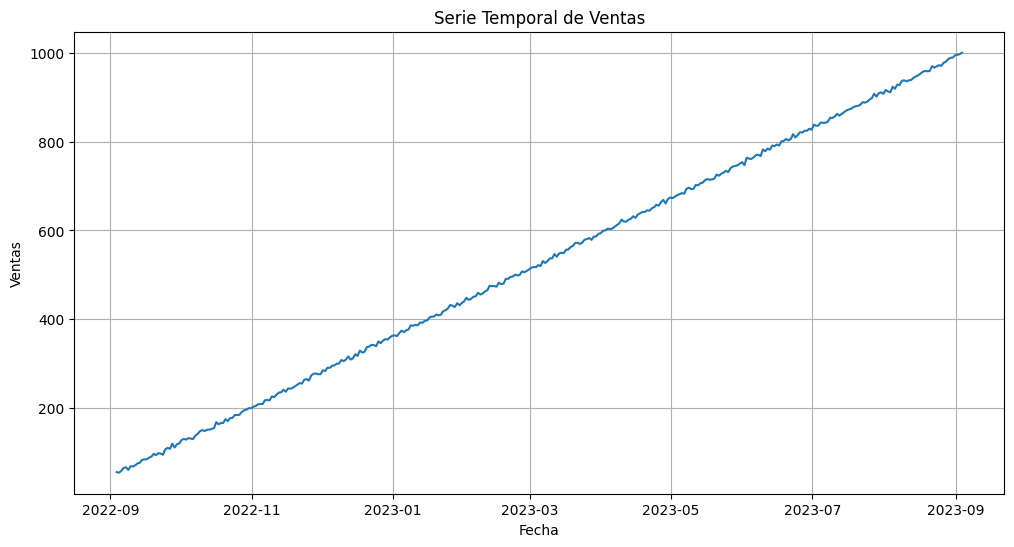

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(dfTs.index, dfTs['sales'])
plt.title('Serie Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [16]:
desco = seasonal_decompose(dfTs['sales'], model='additive', period=12)

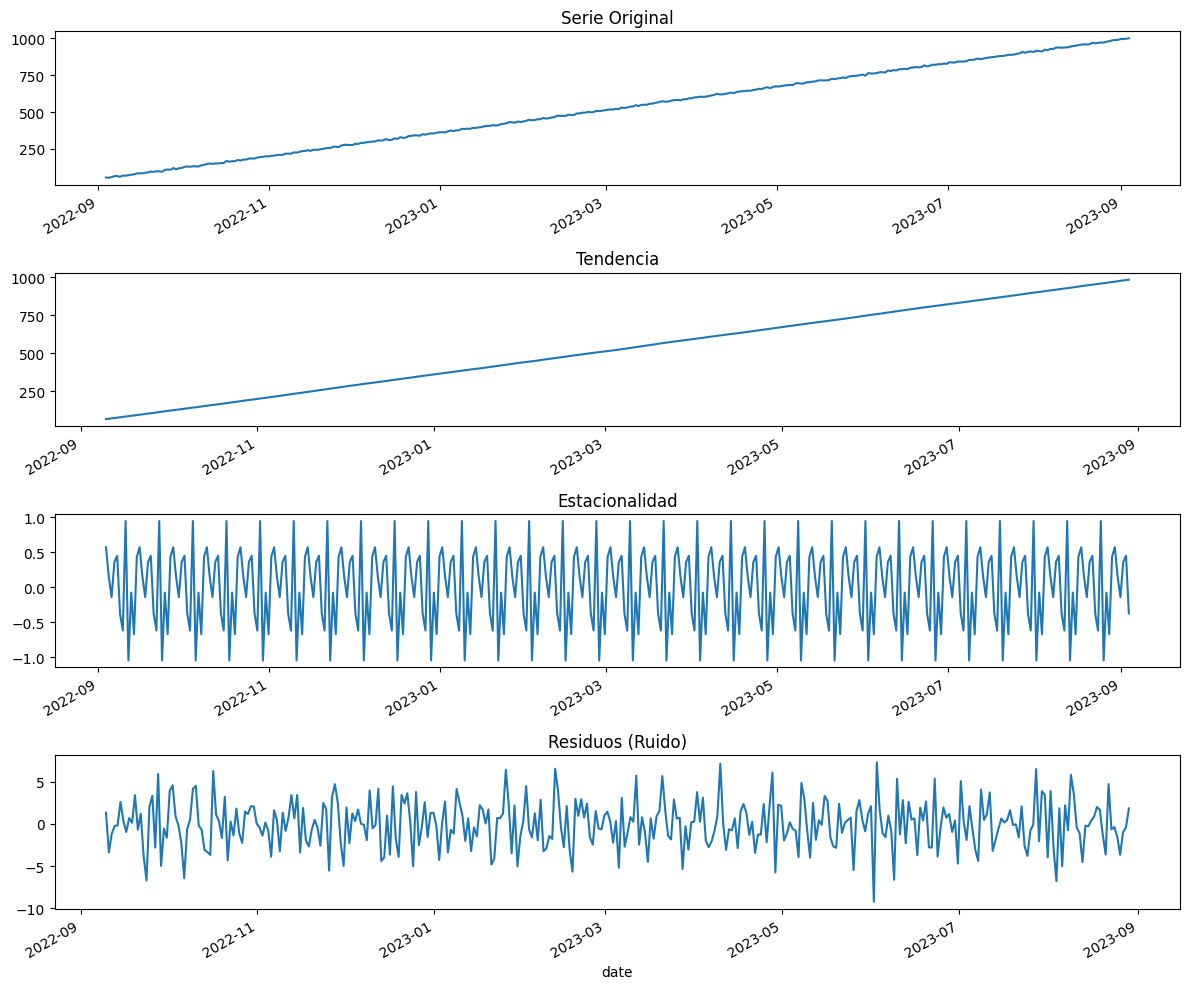

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
desco.observed.plot(ax=ax1)
ax1.set_title('Serie Original')
ax1.set_xlabel('')
desco.trend.plot(ax=ax2)
ax2.set_title('Tendencia')
ax2.set_xlabel('')
desco.seasonal.plot(ax=ax3)
ax3.set_title('Estacionalidad')
ax3.set_xlabel('')
desco.resid.plot(ax=ax4)
ax4.set_title('Residuos (Ruido)')
plt.tight_layout()
plt.show()

In [23]:
#dickey-fuller
def test_estacionariedad(serie):
    print('Resultado del test:')
    result = adfuller(serie, autolag='AIC')

    print(f'Estadistico ADF: {result[0]}')
    print('valor p: {result[1]}')
    print('Critico')
    for key, value in result[4].items():
        print(f' {key}: {value}')

    if result[1] <= 0.05:
        print("La serie es estacionaria (rechazamos la hipotesis nula)")
    else:
        print("La serie no es estacionaria (aceptamos la hipotesis nula)")

test_estacionariedad(df['sales'])

Resultado del test:
Estadistico ADF: 0.545414193706381
valor p: {result[1]}
Critico
 1%: -3.4490648539347544
 5%: -2.8697861692116478
 10%: -2.5711631253228306
La serie no es estacionaria (aceptamos la hipotesis nula)


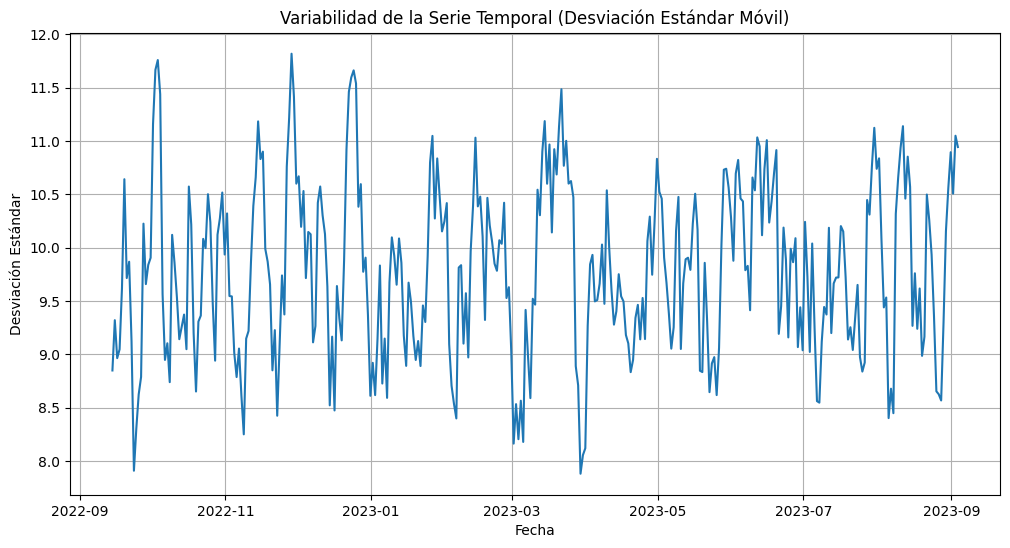

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(dfTs.index, dfTs['sales'].rolling(window=12).std())
plt.title('Variabilidad de la Serie Temporal (Desviación Estándar Móvil)')
plt.xlabel('Fecha')
plt.ylabel('Desviación Estándar')
plt.grid(True)
plt.show()

In [26]:
print("\n--- RESUMEN DEL ANÁLISIS ---")
print("ensor de la serie temporal: Serie univariada de ventas a lo largo del tiempo")
print("Tendencia: Se puede observar en el gráfico de descomposición")
print("Estacionariedad: Según el test de Dickey-Fuller")
print("Variabilidad/Ruido: Se puede observar en el componente residual y en el gráfico de desviación estándar móvil")


--- RESUMEN DEL ANÁLISIS ---
ensor de la serie temporal: Serie univariada de ventas a lo largo del tiempo
Tendencia: Se puede observar en el gráfico de descomposición
Estacionariedad: Según el test de Dickey-Fuller
Variabilidad/Ruido: Se puede observar en el componente residual y en el gráfico de desviación estándar móvil
